In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time 
import csv
import os
from pprint import pprint
from pandas.io.json import json_normalize

In [2]:
df = pd.read_csv("CSV Folder/Poverty_by_state_2018.csv")
df.rename( columns={'new column name':'State'}, inplace=True )
df.head()

,Unnamed: 0,Percent in Poverty (All),90% CI Lower,90%CI Upper,Children ages 0-17 in Poverty,90% CI Lower.1,90%CI Upper.1
0,Alabama,16.8,16.5,17.1,23.9,23.2,24.6
1,Alaska,11.1,10.5,11.7,14.5,13.4,15.6
2,Arizona,14.1,13.8,14.4,20.4,19.7,21.1
3,Arkansas,16.8,16.3,17.3,23.8,22.8,24.8
4,California,12.8,12.7,12.9,17.4,17.1,17.7


In [3]:
df_pop = pd.read_csv("CSV Folder\\SCPRC-EST2019-18+POP-RES.csv")
df_pop= df_pop[["NAME", "POPESTIMATE2019","POPEST18PLUS2019","PCNT_POPEST18PLUS"]]
df_pop = df_pop.rename(columns = {"Name": "State","POPESTIMATE2019":"2019 Pop Est","POPEST18PLUS2019":"2019 18+","PCNT_POPEST18PLUS":"Percent 18+"})

In [4]:
# URL for GET requests to retrieve global count data and all countries data COUNTRIES
url1 = "https://coronavirus-19-api.herokuapp.com/all"
response = requests.get(url1)
print(response.json())
All_data = json_normalize(response.json(), errors='ignore')
print(All_data)

# uploading cases/deaths by country and formatting dataframe
url2 = "https://coronavirus-19-api.herokuapp.com/countries"
response2 = requests.get(url2)
Countries_df = json_normalize(response2.json(), errors='ignore')
Countries_df = Countries_df.iloc[:,[0,1,2,3,4,5,6,7]] 

#imported data on SES and created a dataframe
globses = pd.read_csv("CSV Folder/GLOB.csv", encoding = 'latin-1')
globses = globses[globses["year"]==2010]
globses = globses.reset_index(drop = True)

#merged ses data with countries Covid Data
combined_Countries_df_data = pd.merge(Countries_df, globses, how="left", on=["country", "country"])  
combined_Countries_df_data.dropna(inplace =True) 
combined_Countries_df_data.reset_index(inplace = True, drop = True) 

#Clean up column header names
combined_Countries_df_data.rename(columns = {"country":"Country",
                           "cases":"Total Cases",
                           "todayCases":"Cases Today",
                           "deaths": "Deaths",
                           "todayDeaths":"Deaths Today",
                           "recovered":"Total Recovered",
                           "active":"Active Cases",
                           "critical": "Critical",
                           "gdppc": "GDP per Capita",
                           "yrseduc":"Avg Years Education"}, inplace = True)

#read in government type file and inner merge on country
gov_df = pd.read_csv("CSV Folder/Gov_type.csv")
combined_Countries_df_data2 = combined_Countries_df_data.merge(gov_df, how="inner", on="Country") 
#print(combined_Countries_df_data) use this for the pie chart

{'cases': 2830082, 'deaths': 197246, 'recovered': 798776}
     cases  deaths  recovered
0  2830082  197246     798776


C:\Users\walsh\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """
C:\Users\walsh\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # This is added back by InteractiveShellApp.init_path()


In [5]:
combined_Countries_df_data2.head(12)
top_10 =combined_Countries_df_data2[combined_Countries_df_data2["Total Cases"]>22000]
top_10

,Country,Total Cases,Cases Today,Deaths,Deaths Today,Total Recovered,Active Cases,Critical,unid,wbid,year,SES,GDP per Capita,Avg Years Education,popshare,Government Type
0,Spain,219764,0,22524,0,92355.0,104885,7705,724.0,ESP,2010.0,85.359718,32506.4340,10.3821,0.006912,parliamentary constitutional monarchy
1,Italy,192994,0,25969,0,60498.0,106527,2173,380.0,ITA,2010.0,85.016357,36201.1600,9.5096,0.008797,parliamentary republic
2,France,159828,0,22245,0,43493.0,94090,4870,250.0,FRA,2010.0,88.194969,36872.2270,10.5329,0.009650,semi-presidential republic
3,Germany,154999,0,5760,0,106800.0,42439,2908,276.0,DEU,2010.0,92.546394,40428.7230,11.8231,0.012136,federal parliamentary republic
4,Turkey,104912,0,2600,0,21737.0,80575,1790,792.0,TUR,2010.0,60.248875,17076.6050,7.0157,0.010731,presidential republic
5,Iran,88194,0,5574,0,66599.0,16021,3121,364.0,IRN,2010.0,76.485092,17517.4340,8.5859,0.011019,theocratic republic
6,Brazil,52995,0,3670,0,27655.0,21670,8318,76.0,BRA,2010.0,61.067955,14405.9310,7.5391,0.029474,federal presidential republic
7,Belgium,44293,0,6679,0,10122.0,27492,970,56.0,BEL,2010.0,89.668945,41086.5510,10.5453,0.001617,federal parliamentary democracy under a consti...
8,Canada,43888,0,2302,0,15469.0,26117,557,124.0,CAN,2010.0,93.772118,40699.3550,12.0827,0.005046,federal parliamentary democracy (Parliament of...
9,Switzerland,28677,0,1589,0,21000.0,6088,386,756.0,CHE,2010.0,91.012245,55541.6720,9.8763,0.001161,federal republic (formally a confederation)


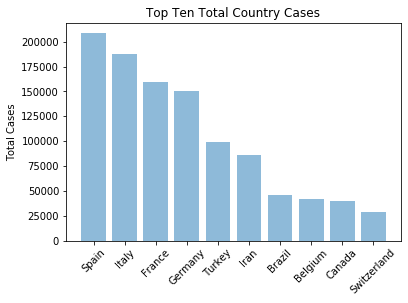

In [6]:
#Mat Bar Graph

x_axis = ('Spain','Italy','France','Germany','Turkey','Iran','Brazil','Belgium','Canada','Switzerland')
y_pos = np.arange(len(x_axis))
y_axis = (208389,187327,159877,150062,98674,85996,45757,41889,39813,28268)
plt.bar(x_axis, y_axis, align='center', alpha=0.5)
plt.xticks(y_pos, x_axis, rotation = 45)
plt.ylabel('Total Cases')
plt.title('Top Ten Total Country Cases')

plt.show()

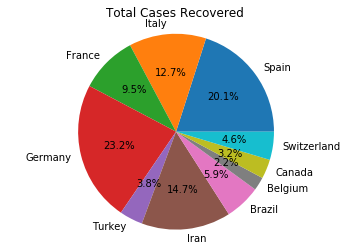

In [7]:
#Mat Pie Graph

labels =('Spain','Italy','France','Germany','Turkey','Iran','Brazil','Belgium','Canada','Switzerland')
cases_recovered = (85915,54543,40657,99400,16477,63113,25318,9433,13647,19900)
plt.pie(cases_recovered,labels=labels,autopct='%1.1f%%')
plt.title('Total Cases Recovered')
plt.axis('equal')
plt.show()

In [8]:
combined_Countries_df_data2.head(12)

,Country,Total Cases,Cases Today,Deaths,Deaths Today,Total Recovered,Active Cases,Critical,unid,wbid,year,SES,GDP per Capita,Avg Years Education,popshare,Government Type
0,Spain,219764,0,22524,0,92355.0,104885,7705,724.0,ESP,2010.0,85.359718,32506.4340,10.3821,0.006912,parliamentary constitutional monarchy
1,Italy,192994,0,25969,0,60498.0,106527,2173,380.0,ITA,2010.0,85.016357,36201.1600,9.5096,0.008797,parliamentary republic
2,France,159828,0,22245,0,43493.0,94090,4870,250.0,FRA,2010.0,88.194969,36872.2270,10.5329,0.009650,semi-presidential republic
3,Germany,154999,0,5760,0,106800.0,42439,2908,276.0,DEU,2010.0,92.546394,40428.7230,11.8231,0.012136,federal parliamentary republic
4,Turkey,104912,0,2600,0,21737.0,80575,1790,792.0,TUR,2010.0,60.248875,17076.6050,7.0157,0.010731,presidential republic
5,Iran,88194,0,5574,0,66599.0,16021,3121,364.0,IRN,2010.0,76.485092,17517.4340,8.5859,0.011019,theocratic republic
6,Brazil,52995,0,3670,0,27655.0,21670,8318,76.0,BRA,2010.0,61.067955,14405.9310,7.5391,0.029474,federal presidential republic
7,Belgium,44293,0,6679,0,10122.0,27492,970,56.0,BEL,2010.0,89.668945,41086.5510,10.5453,0.001617,federal parliamentary democracy under a consti...
8,Canada,43888,0,2302,0,15469.0,26117,557,124.0,CAN,2010.0,93.772118,40699.3550,12.0827,0.005046,federal parliamentary democracy (Parliament of...
9,Switzerland,28677,0,1589,0,21000.0,6088,386,756.0,CHE,2010.0,91.012245,55541.6720,9.8763,0.001161,federal republic (formally a confederation)


In [9]:
# reaching out to API to get current overall state data pertaining to cases, tests, hospitalizations, and deaths
url3 = "https://covidtracking.com/api/states"
response3 = requests.get(url3)
#Turned entire response into a dataframe
US_df = json_normalize(response3.json(), errors='ignore')
#Narrowed df to specific columns of interest 
US_df = US_df.iloc[:,[0,1,8,9,22,16,10,19]]

#Read in a State Name Abbrev CSV so that df's could be joined with different state naming conventions
st_abrev = pd.read_csv("CSV Folder/Covid Analysis Data - StateNameAbrev.csv")

# Replacing the state abbreviation with names for joining to other data
tests_df = st_abrev.merge(US_df, how = 'inner',left_on = "Abbreviation",right_on = "state")

#Droping abbreviation column since no other dataset used abbrev.
tests_df.drop(columns = ["Abbreviation","state"],inplace = True)

#Read in the Poverty Data File and Population Data File
df = pd.read_csv("CSV Folder/Poverty by state 2018.csv")
pop_df = pd.read_csv("CSV Folder/SCPRC-EST2019-18+POP-RES.csv")

#Select and rename columns of interest for merging
df.rename( columns={'Unnamed: 0':'State'}, inplace=True )
pop_df= pop_df[["NAME", "POPESTIMATE2019","POPEST18PLUS2019","PCNT_POPEST18PLUS"]]
pop_df = pop_df.rename(columns = {"NAME": "State","POPESTIMATE2019":"2019 Pop Est","POPEST18PLUS2019":"2019 18+","PCNT_POPEST18PLUS":"Percent 18+"})

#Merge the poverty and population df's and then merge with the state tests_df
poverty_df = pop_df.merge(df,how = 'inner',on = "State")
pov_death = tests_df.merge(poverty_df,how = 'inner', on = "State")

pov_death.head()

pov_death.sort_values("Percent in Poverty (All)", ascending = False).head()
bins = (0,10,11,12,13,14,15,16,17,20)
labels = ("< 10","10-10.99","11-11.99","12-12.99","13-13.99","14-14.99","15-15.99","16-16.99","> 17")
pov_death["Poverty Groups"] = pd.cut(x = pov_death["Percent in Poverty (All)"], bins = bins, labels = labels)
pov_death.rename(columns = {"death":"Deaths","positive":"Cases","negative":"Negative Tests","totalTestResults":"Total Tests"},inplace=True)
pov_death  

C:\Users\walsh\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,State,Cases,notes,dataQualityGrade,hospitalized,onVentilatorCurrently,Negative Tests,lastUpdateEt,2019 Pop Est,2019 18+,Percent 18+,Percent in Poverty (All),90% CI Lower,90%CI Upper,Children ages 0-17 in Poverty,90% CI Lower.1,90%CI Upper.1,Poverty Groups
0,Alabama,5832,"Please stop using the ""total"" field. Use ""tota...",B,768.0,NaN,46863,4/24 00:00,4903185,3814879,77.8,16.8,16.5,17.1,23.9,23.2,24.6,16-16.99
1,Alaska,339,"Please stop using the ""total"" field. Use ""tota...",B,NaN,NaN,11942,4/24 15:00,731545,551562,75.4,11.1,10.5,11.7,14.5,13.4,15.6,11-11.99
2,Arizona,6045,"Please stop using the ""total"" field. Use ""tota...",A+,984.0,186.0,54669,4/24 00:00,7278717,5638481,77.5,14.1,13.8,14.4,20.4,19.7,21.1,14-14.99
3,Arkansas,2741,"Please stop using the ""total"" field. Use ""tota...",B,291.0,24.0,32837,4/24 10:47,3017804,2317649,76.8,16.8,16.3,17.3,23.8,22.8,24.8,16-16.99
4,California,39254,"Please stop using the ""total"" field. Use ""tota...",B,NaN,NaN,454919,4/23 00:00,39512223,30617582,77.5,12.8,12.7,12.9,17.4,17.1,17.7,12-12.99
5,Colorado,11262,"Please stop using the ""total"" field. Use ""tota...",C,2237.0,NaN,41062,4/23 00:00,5758736,4499217,78.1,9.7,9.5,9.9,12.1,11.4,12.8,< 10
6,Connecticut,23921,"Please stop using the ""total"" field. Use ""tota...",C,NaN,NaN,50117,4/24 16:00,3565287,2837847,79.6,10.3,10.0,10.6,13.8,13.1,14.5,10-10.99
7,Delaware,3442,"Please stop using the ""total"" field. Use ""tota...",C,NaN,NaN,13937,4/23 18:00,973764,770192,79.1,12.2,11.6,12.8,17.6,16.4,18.8,12-12.99
8,Florida,30174,"Please stop using the ""total"" field. Use ""tota...",C,4888.0,NaN,286785,4/24 09:41,21477737,17247808,80.3,13.7,13.5,13.9,20.0,19.5,20.5,13-13.99
9,Georgia,22147,"Please stop using the ""total"" field. Use ""tota...",B,4221.0,NaN,85029,4/24 11:28,10617423,8113542,76.4,14.5,14.2,14.8,21.0,20.4,21.6,14-14.99


In [10]:
df

,State,Percent in Poverty (All),90% CI Lower,90%CI Upper,Children ages 0-17 in Poverty,90% CI Lower.1,90%CI Upper.1
0,New Hampshire,7.6,7.3,7.9,10.1,9.1,11.1
1,Hawaii,9.0,8.5,9.5,11.8,10.7,12.9
2,Maryland,9.1,8.8,9.4,12.1,11.4,12.8
3,New Jersey,9.5,9.3,9.7,13.5,12.9,14.1
4,Minnesota,9.6,9.4,9.8,11.5,10.9,12.1
5,Colorado,9.7,9.5,9.9,12.1,11.4,12.8
6,Massachusetts,10.0,9.8,10.2,12.4,11.7,13.1
7,Connecticut,10.3,10.0,10.6,13.8,13.1,14.5
8,Washington,10.3,10.1,10.5,12.6,12.0,13.2
9,North Dakota,10.6,10.0,11.2,11.0,10.0,12.0


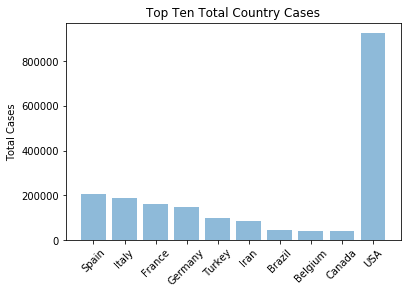

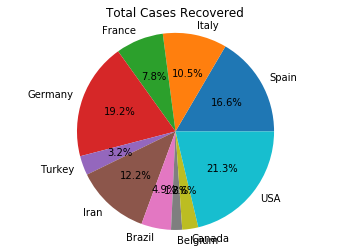

In [11]:
x_axis = ('Spain','Italy','France','Germany','Turkey','Iran','Brazil','Belgium','Canada','USA')
y_axis = (208389,187327,159877,150062,98674,85996,45757,41889,39813,925038)

plt.bar(x_axis, y_axis, align='center', alpha=0.5)
plt.xticks(y_pos, x_axis, rotation = 45)
plt.ylabel('Total Cases')
plt.title('Top Ten Total Country Cases')
plt.show()

labels =('Spain','Italy','France','Germany','Turkey','Iran','Brazil','Belgium','Canada','USA')
cases_recovered = [85915,54543,40657,99400,16477,63113,25318,9433,13647,110432]

plt.pie(cases_recovered,labels=labels,autopct='%1.1f%%')
plt.title('Total Cases Recovered',)
plt.axis('equal', rotation = 45)
plt.show()